# HW 10 CLUSTERING BUSINESS

## cluster time trends in NYC businesses: 
### DATA
Census Business data  
NYC zip codes shape file

In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import json
import os
import zipfile
import urllib2
import geopandas as gp
from sklearn import cluster
from sklearn import mixture
from scipy.cluster.vq import kmeans2
url = urllib2.urlopen("https://raw.githubusercontent.com/fedhere/PUI2015_fbianco/master/fbb_matplotlibrc.json")
s = json.load(url)
pl.rcParams.update(s)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/Dexter/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/Dexter/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [10]:
len(zipcode['features'])

262

In [3]:
with open("nyc-zip-code-tabulation-areas-polygons.geojson") as zipjson:    
    zipcode = json.load(zipjson)

nyczip = []
for i in range (len(zipcode['features'])):
    nyczip.append(str(zipcode['features'][i]['properties']['postalCode']))
    
print "Number of Zipcode =", len(nyczip)

Number of Zipcode = 262


In [4]:
qw = {}
for i in range (1994,2014):
    if i in range(1998, 2003):
        fname = 'zbp' + str(i)[2:] +'totals.zip'
        zf = zipfile.ZipFile(fname)
        df = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
        df = df.rename(columns={'ZIP': 'zip', 'EST': str(i)})
        df = df[(df.zip.astype(str).isin(nyczip))]
        qw['{}'.format(i)] = df[['zip',str(i)]]
    else:
        fname = 'zbp' + str(i)[2:] +'totals.zip'
        zf = zipfile.ZipFile(fname)
        df = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
        df = df.rename(columns={'est': str(i)})
        df = df[(df.zip.astype(str).isin(nyczip))]
        qw['{}'.format(i)] = df[['zip',str(i)]]
    
        
#Merge the data based on zipcode
dfs = [qw['1994'], qw['1995'], qw['1996'], qw['1997'], qw['1998'],qw['1999'],qw['2000'],qw['2001'],qw['2002'],qw['2003'],qw['2004'],qw['2005'],qw['2006'],qw['2007'],qw['2008'],qw['2009'],qw['2010'],qw['2011'],qw['2012'],qw['2013'],]
df_final = reduce(lambda left,right: pd.merge(left,right,on='zip', how = 'inner'), dfs)
df_final = df_final.set_index('zip')
print "Sanity Check: Shape of the dataframe =", df_final.shape
print ""
df_final.head()

Sanity Check: Shape of the dataframe = (230, 20)



,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
zip,,,,,,,,,,,,,,,,,,,,
10001,6999,7088,7075,7154,7254,7233,7317,7188,7141,7084,7370,7312,7415,7549,7472,7305,7241,7227,7235,7273
10002,1784,1819,1919,2049,2003,2085,2277,2543,2269,2402,2551,2682,2686,2685,2691,2775,2872,2912,2954,2988
10003,3256,3377,3417,3535,3649,3659,3683,3602,3616,3704,3776,3867,3909,4049,4071,4099,4113,4159,4214,4277
10004,1115,1124,1133,1173,1176,1233,1294,1247,1253,1252,1283,1260,1311,1370,1376,1379,1398,1404,1442,1479
10005,1076,1109,1216,1227,1270,1242,1287,1249,1244,1200,1226,1214,1259,1273,1291,1274,1266,1301,1273,1296


Sanity Check
mean: -0.00
std: 1.0


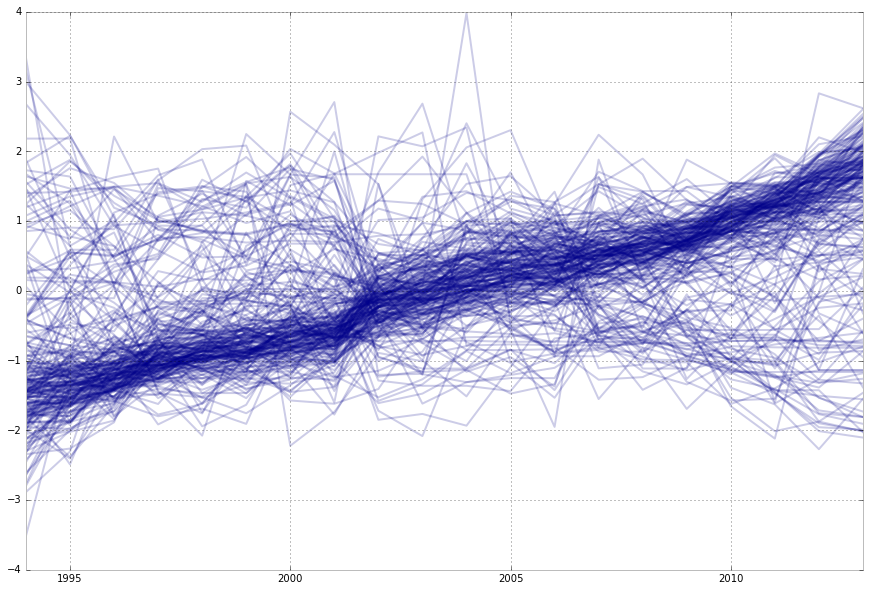

In [5]:
#subtract the mean and divide each time series (separately) by its standard deviation.

df_final = df_final.dropna()

mydata = df_final
for i in range(len(mydata)):
    mydata.iloc[i] = (mydata.iloc[i]-np.mean(mydata.iloc[i]))/np.std(mydata.iloc[i])

#print mydata.head()
dbb = mydata.copy()
#print dbb.head()
print "Sanity Check"
print "mean:", ("{0:.2f}".format(np.mean(mydata.iloc[i])))
print "std:", np.std(mydata.iloc[i])

pl.figure(figsize=(15,10))
pl.xlim(1994,2013)
for i in range(len(mydata)):
    pl.plot(mydata.iloc[i].index, mydata.iloc[i],'darkblue', alpha=0.2) 

(1994, 2013)

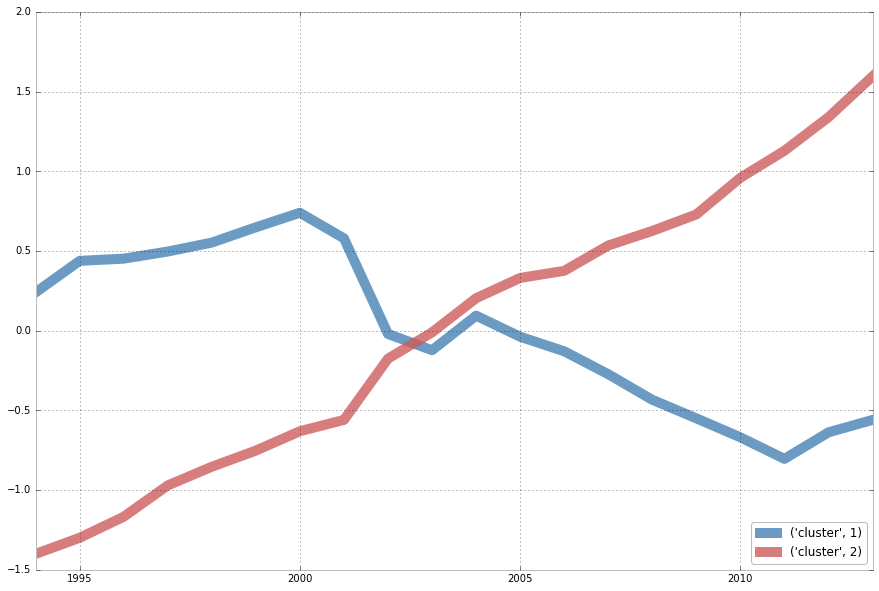

In [6]:
# k means cluster results depend on the starting point, which is random!
random.seed((1,7))

#When use kmeans2, mydata needs to be convert to np.asarray, minit needs to change to points
#otherwise it will give an error of matrix is not positive definite

#Try 2 cluster first
mydata2= mydata
nk= 2
centroids_2, label_2 = kmeans2(np.asarray(mydata2), 2, iter=20, minit = 'points')

year = np.arange(1994,2014)
# print centroids_2[0], label_2, label_2.shape
pl.figure(figsize=(15,10))
for i in range(len(centroids_2)):
    pl.plot(year, centroids_2[i], alpha=0.8, linewidth=10, label=("cluster",i+1)) 
pl.legend(loc=4)
pl.xlim(1994,2013)

In [9]:
mydata2.iloc[-1]

1994      -1.549357
1995      -1.724425
1996      -1.374288
1997      -0.674014
1998      -0.674014
1999      -0.674014
2000      -0.498945
2001      -0.323877
2002      -0.849082
2003       0.201329
2004       0.201329
2005       0.026260
2006       1.251740
2007       1.076671
2008       1.251740
2009       1.601877
2010       1.076671
2011       0.726534
2012       1.251740
2013      -0.323877
cluster    1.000000
Name: 11697, dtype: float64

ValueError: could not convert string to float: cluster

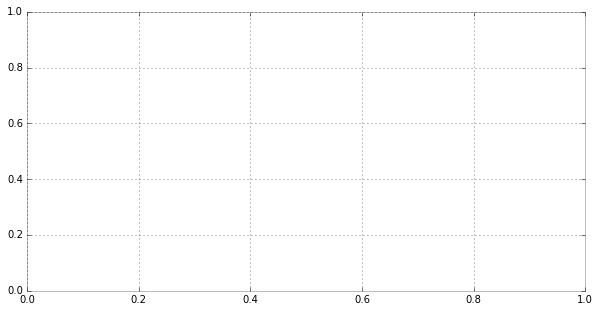

In [7]:
#add cluster number to my data
mydata2['cluster']=label_2

#plot the cluster over the original data
fig = pl.figure(figsize=(10,5))
#ax = []
ax = fig.add_subplot(1,1,1)
#for i in range(len(centroids)):
#    ax.append(fig.add_subplot(len(centroids),1,i+1))
for i in range(len(mydata2)):
    cluster = int(mydata2.cluster.iloc[i])
    pl.plot(mydata2.iloc[i],'k', alpha = 0.3)
for i in range(len(centroids_2)):
    pl.plot(centroids_2[i], alpha=0.8, linewidth=10, color=kelly_colors_hex[i], label=('cluster',i)) 
pl.xlim(0,19)
ax.set_xticklabels(['1993', '1998', '2003', '2008'])    
pl.title('2 Clusters', size=20)

you may need to clean your data: for some NYC zip codes there may be no info
    
sanity check: you should have 20 (Ntimestamps) datapoints per time series and about 250 zipcodes (Nzipcodes)

IMPORTANT: we talked about the importance of "whitening" your data: dividing each feature by its standard deviation. 
Whitenings decorrelates the data: it makes the features independent so that the data covariance matrix is the identity matrix.
Whitening your data in time series analysis is in most cases **wrong**: you are modifying your time behaviour. This is because of the strong correlation between features (two consecutive time stamps for the same observation, the same zip code here, are strongly correlated). Here instead you want to standardize your time series: subtract the mean and divide each time series (separately) by its standard deviation. As a sanity check (if you use skitlearn Kmeans or skitlearns kmeans2): you want your data array to be shaped Nzipcodes x Ntimestamps

mydata.shape should be (Nzipcodes, Ntimestamps)

mydata[i].std() shoould be 1 for all i in range(len(Nzipcodes))

mydata[i].mean() should be ~0 for all i in range(len(Nzipcodes))



TASKS:
    
    1. get and prep your data.
    2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means in **a few** clusters (as discussed there is no real good, sound way to decide what a good number is here. try a few options, keeping in mind a few is more than a couple, but i recommand you stay within the single digit numbers)
    3. plot the cluster centers (if you used K means those are the means of the clusters). you can plot for example the cluster centers overlayed on each time series (using the alpha channel to control the opacity in the plot may be helpful here).
    4. Use another clustering algorithm (of your choice)
    5. overlay your data on a NYC map: you can use shapefiles for the zip codes and different colors for different clusters
    6. Compare the results of the 2 algorithms
    7. attempt an interpretation. this is dangerous ground: clustering is an exploratory tool so you do not want to jump to conclusions because you see some clusters! but seeing structure in your data can inform your next moves as an investigator. 
    